## 1: Setting Up DF1

#### 1.1: Importing Modules

In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns    #not required until graphing
from datetime import datetime
import matplotlib.pyplot as plt
sns.set
sns.set_palette("deep")

#### 1.2: Adjusting Directory

In [2]:
env = os.chdir(r'C:\Users\alexb\OneDrive\Documents\02 - Work\coding\TimeSeries')
path = os.getcwd()
path

'C:\\Users\\alexb\\OneDrive\\Documents\\02 - Work\\coding\\TimeSeries'

#### 1.3: Importing Data

In [3]:
df1 = pd.read_csv("s&p500_data.csv", infer_datetime_format = True)
df1.head(6)

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN
5,1871-06-01,4.82,0.26,0.4,12.08,5.34,99.66,5.38,8.27,NaN


#### 1.4- Adjusting for inflation

https://timeseriesreasoning.com/contents/inflation-adjustment/#:~:text=The%20formula%20for%20inflation%20adjustment,multiplying%20the%20result%20by%20100.

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [4]:
df1["price"] = df1["SP500"]/df1["Consumer Price Index"]*100
df1.head(6)

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10,price
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN,35.634029
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN,35.046729
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN,35.379893
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN,37.738854
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN,39.608802
5,1871-06-01,4.82,0.26,0.4,12.08,5.34,99.66,5.38,8.27,NaN,39.900662


#### 1.5: Isolating relevant variables

In [5]:
exclusions = ["Dividend","Earnings","Real Dividend","Real Earnings","Real Price","Long Interest Rate","PE10","Consumer Price Index","SP500"]
i = 0
while i < len(exclusions):
    df1.drop(exclusions[i], inplace=True, axis=1)
    i = i + 1

df1.head(6)

,Date,price
0,1871-01-01,35.634029
1,1871-02-01,35.046729
2,1871-03-01,35.379893
3,1871-04-01,37.738854
4,1871-05-01,39.608802
5,1871-06-01,39.900662


## 2: Setting up DF2

#### 2.1 : Create list to iterate over

In [9]:
date_list = pd.to_datetime(df1['Date'])
#print(date_list.head(6))

rows = len(date_list) 
#rows      # to give us the number of times we need to run the loop

#### 2.2: Define bins

In [10]:
months_in_year = 12
years_in_window = 15
bin_size = months_in_year * years_in_window
bin_size

180

#### 2.3 : Define bin-creation function

In [11]:
def make_list(start):
    list1 = []
    end = start + bin_size
    i = 0
    for i in range(rows):
        if i < start or i > end:
            list1.append(np.nan)
            i = i + 1
        else:
            dummy = df1.iloc[i,1]
            list1.append(dummy)
            i = i + 1
    return list1


#### 2.4 - Testing the function (works)

In [12]:
#list1 = make_list(10)
#print(list1) 

#### 2.5 - Create DF2

In [13]:
#df2 = pd.DataFrame()
#df2.insert(0,1,list1)

#df2.head(20) # Works


In [14]:
df2 = pd.DataFrame()

for i in range(rows):
    list1 = make_list(i)
    df2.insert(i,i,list1)

df2.head(5)

C:\Users\alexb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


,0,1,2,3,4,5,6,7,8,9,...,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767
0,35.634029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35.046729,35.046729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35.379893,35.379893,35.379893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37.738854,37.738854,37.738854,37.738854,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39.608802,39.608802,39.608802,39.608802,39.608802,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3 - Analysing the data

#### 2.1. Generating list of end values
We have a list with all of the starting values (df1). We want to find the final value to be able to find compound growth, so we shift each index forward 180 to get the ending value

In [15]:
start_values = []

i = 0

for i in range(rows):
    start_index = i - bin_size
    if start_index >= 0:
        dummy = df1.iloc[start_index,1]
        start_values.append(dummy)
        i = i + 1
    else:
        start_values.append(np.nan)
        i = i + 1

#print(start_values) #Works. This will be appended to dataframe


In [16]:
df1["start price"] = start_values
df1.head(185)

,Date,price,start price
0,1871-01-01,35.634029,NaN
1,1871-02-01,35.046729,NaN
2,1871-03-01,35.379893,NaN
3,1871-04-01,37.738854,NaN
4,1871-05-01,39.608802,NaN
...,...,...,...
180,1886-01-01,65.081352,35.634029
181,1886-02-01,66.332916,35.046729
182,1886-03-01,65.696203,35.379893
183,1886-04-01,65.641026,37.738854


#### CAGR
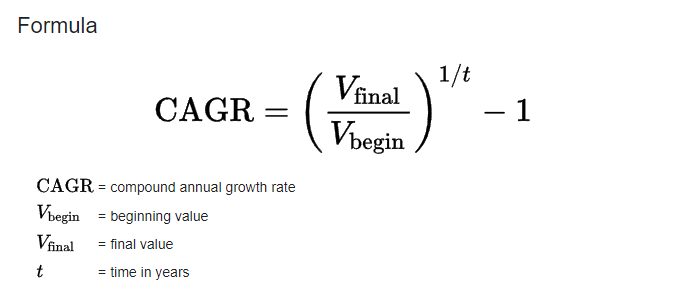


In [17]:
df1["cagr"] = (((df1["price"]/df1["start price"])**(1/years_in_window))-1)*100
df1["Date"] = pd.to_datetime(df1["Date"])
df1.set_index('Date', inplace=True)

df1.head(185)


,price,start price,cagr
Date,,,
1871-01-01,35.634029,NaN,NaN
1871-02-01,35.046729,NaN,NaN
1871-03-01,35.379893,NaN,NaN
1871-04-01,37.738854,NaN,NaN
1871-05-01,39.608802,NaN,NaN
...,...,...,...
1886-01-01,65.081352,35.634029,4.097295
1886-02-01,66.332916,35.046729,4.345111
1886-03-01,65.696203,35.379893,4.212285


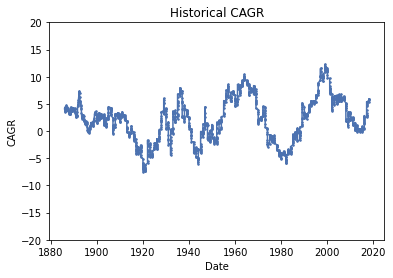

In [18]:
plt.plot(df1["cagr"], marker="o", ms=1.5)

# Labelling 

plt.xlabel("Date")
plt.ylabel("CAGR")
plt.title("Historical CAGR")

#plt.xlim([datetime.date(1886, 1, 1), datetime.date(2018, 1, 1)])
plt.ylim(-20,20)

# Display

plt.show()

Key question, is this significantly different from zero? 

https://www.codecademy.com/article/seaborn-design-ii

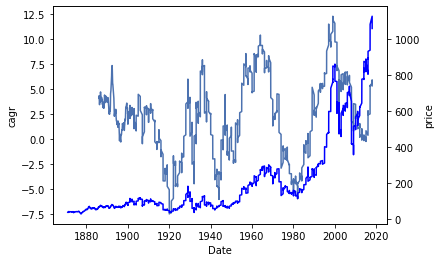

In [19]:
sns.lineplot(data=df1["cagr"])
ax2 = plt.twinx()
sns.lineplot(data=df1["price"], color="b", ax=ax2)

plt.show()

Zeros are affecting the chart (because of the last 180 values

#### Standard Deviation

In [20]:
#df2[4].std()
#print(df2[4].head(6))

#print(df2[0])
print(df2[0].std())


10.35143530344215


In [21]:
std_dev_list = []

i = 0

for i in range(rows):
    if i < bin_size:
        std_dev_list.append(0)
        i = i + 1
    else: 
        dummy = df2[i].std()
        std_dev_list.append(dummy)
        i = i + 1

#print(std_dev_list)
df1["std dev"] = std_dev_list

df1.head(185)

,price,start price,cagr,std dev
Date,,,,
1871-01-01,35.634029,NaN,NaN,0.000000
1871-02-01,35.046729,NaN,NaN,0.000000
1871-03-01,35.379893,NaN,NaN,0.000000
1871-04-01,37.738854,NaN,NaN,0.000000
1871-05-01,39.608802,NaN,NaN,0.000000
...,...,...,...,...
1886-01-01,65.081352,35.634029,4.097295,7.269496
1886-02-01,66.332916,35.046729,4.345111,7.496481
1886-03-01,65.696203,35.379893,4.212285,7.782429


Getting a grip on getting the right condition

In [42]:
def predict_value(cagr,start_value):
    if start_value = np.nan
        predicted value = 0
    else:
        predicted_value = start_value * ((1 + cagr)**years_in_window)
    
    return predicted_value
    
value = predict_value(0.04097295,35.634029 )
value

SyntaxError: invalid syntax (Temp/ipykernel_41956/192900583.py, line 2)

In [37]:
#print(years_in_window)

#print(df1.head(185))

start = df1.iloc[1,1]
print(start)

cagr = df1.iloc[181,2]
cagr_1 = cagr/100
print(cagr_1)

nan
0.043451113117221496


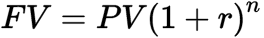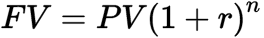

In [2]:
predictions = []

i = 0

for i in range(rows):
    start = df1.iloc[i,1]
    cagr = df1.iloc[i,2]
    cagr_1 = cagr/100
    predicted_value = predict_value(cagr_1,start)
    predictions.append(predicted_value)
    i = i + 1
    
#print(cond1_pred)
df1["15-year predictions"] = predictions
df1.head(185)


NameError: name 'rows' is not defined

In [25]:
print(cagr)
print(start)

5.345550185157966
484.23830250272033


In [41]:
# print(df1.iloc[i,2])
df1.iloc[1,2]

nan

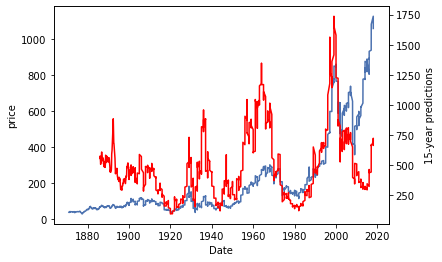

In [59]:
sns.lineplot(data=df1["price"])
ax2 = plt.twinx()
sns.lineplot(data=df1["15-year predictions"], color="r", ax=ax2)

plt.show()

In [34]:
i = 0
counter = 0

for i in range(rows):
    prediction = df1.iloc[i,4]
    price = df1.iloc[i,0]
    std_dev = df1.iloc[i,3]
    
    if price < prediction:
        counter = counter + 1
        i = i + 1
    else: 
        i = i + 1
        
print(counter)
    

715


In [35]:
df1["difference"] = df1["price"]-df1["15-year predictions"]
df1.head(185)

,price,start price,cagr,std dev,15-year predictions,difference
Date,,,,,,
1871-01-01,35.634029,NaN,NaN,0.000000,NaN,NaN
1871-02-01,35.046729,NaN,NaN,0.000000,NaN,NaN
1871-03-01,35.379893,NaN,NaN,0.000000,NaN,NaN
1871-04-01,37.738854,NaN,NaN,0.000000,NaN,NaN
1871-05-01,39.608802,NaN,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...
1886-01-01,65.081352,35.634029,4.097295,7.269496,65.081352,8.526513e-14
1886-02-01,66.332916,35.046729,4.345111,7.496481,66.332916,-9.947598e-14
1886-03-01,65.696203,35.379893,4.212285,7.782429,65.696203,-4.263256e-14


In [36]:
df1["difference"].describe()

count    1.588000e+03
mean     1.190651e-14
std      2.765348e-13
min     -1.591616e-12
25%     -7.105427e-14
50%      0.000000e+00
75%      8.526513e-14
max      1.477929e-12
Name: difference, dtype: float64

In [49]:
def temp_dataframe(i):
    start_value = i
    end_value = i + 180
    temp_df1 = df1.iloc[start_value:end_value, 0:5]
    temp_df = pd.DataFrame(data=temp_df1)
    return temp_df
    

#test = temp_dataframe(1500)
#test.head(6)
#test.describe()

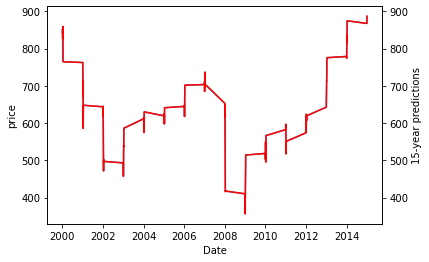

In [52]:
analysis1 = temp_dataframe(1550)

#analysis1

sns.lineplot(data=analysis1["price"])
ax2 = plt.twinx()
sns.lineplot(data=analysis1["15-year predictions"], color="r", ax=ax2)

plt.show()

#### Appendix: Data Structures
- *df1*: contains original SnP data, indexed by date (pd)
- *date_list*: list containing only the (list)
- *df2*: list containing final data in rolling periods
- *list1*: temporary list storing values for a single column in df2



#### Variables